## Data Exploration: Historical Trends in Patents

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("../csv/annual_historical.csv")
df = df.set_index("year")

categoriesdf = pd.read_csv("../csv/patents1840-2014.csv")


In [3]:
#Retrieve the dataframe with the aggregated columns for each macro-category
nber_categories = df.iloc[:,40:46]
nber_categories.columns = ['Chemical',
                           'Computers & Communications',
                           'Drugs & Medical',
                           'Electrical & Electronic',
                           'Mechanical',
                           'Others']
nber_categories.head()

,Chemical,Computers & Communications,Drugs & Medical,Electrical & Electronic,Mechanical,Others
year,,,,,,
1840,427,35,73,53,1537,1894
1841,470,32,81,62,1727,2078
1842,524,31,88,70,1869,2286
1843,567,30,99,71,2001,2480
1844,614,28,110,75,2128,2640


In [4]:
#Retrieve aggregated data for each macro-category
drugs = nber_categories["Drugs & Medical"]
chemical = nber_categories["Chemical"]
computers = nber_categories["Computers & Communications"]
electronic = nber_categories["Electrical & Electronic"]
mechanical = nber_categories["Mechanical"]
others = nber_categories["Others"]

Text(0.5, 1.0, 'Total Patents in Force 1840-2014')

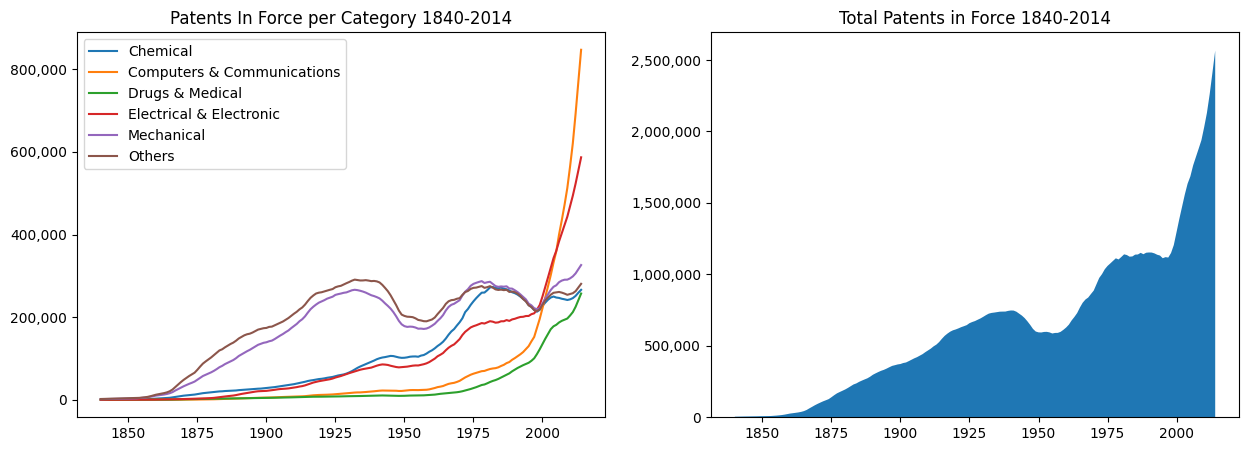

In [5]:
def format_with_commas(value,pos):
    return "{:,.0f}".format(value)
commaformatter = FuncFormatter(format_with_commas)

fig, axes = plt.subplots(ncols=2, figsize=(15,5))
indcat = 39
for column in df.columns[40:46]:
    axes[0].plot(df.index, df[column],label=categoriesdf.loc[indcat,"CatNameLong"])
    indcat +=1 

axes[0].legend()
axes[0].set_title("Patents In Force per Category 1840-2014")
axes[0].yaxis.set_major_formatter(commaformatter)


formatter = ScalarFormatter()
formatter.set_scientific(False)


axes[1].stackplot(df.index, df["total_inforce"])
#axes[1].set_yscale('log')
axes[1].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(commaformatter)
axes[1].set_title("Total Patents in Force 1840-2014")


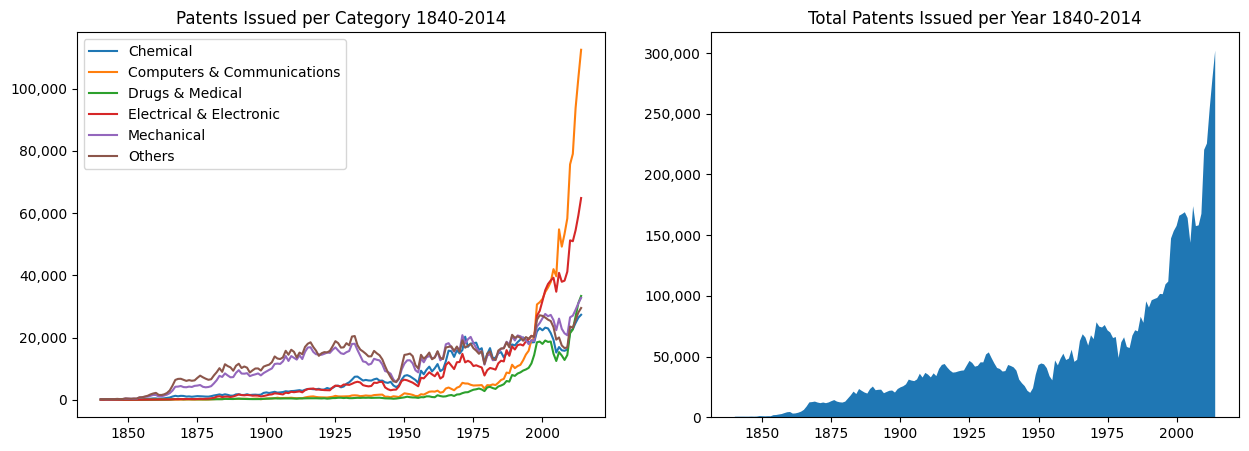

In [6]:

fig, axes = plt.subplots(ncols=2, figsize=(15,5))
indcat = 88
indx = 0
for column in df.columns[136:142]:
    axes[0].plot(df.index, df[column],label=nber_categories.columns[indx])
    indcat +=1 
    indx += 1

axes[0].legend()
axes[0].set_title("Patents Issued per Category 1840-2014")
axes[0].yaxis.set_major_formatter(commaformatter)


formatter = ScalarFormatter()
formatter.set_scientific(False)


axes[1].stackplot(df.index, df["total_iss"])
#axes[1].set_yscale('log')
axes[1].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(commaformatter)
axes[1].set_title("Total Patents Issued per Year 1840-2014")

plt.show()


In [7]:
nber_subcategories = df.iloc[:,1:39]

In [8]:
corr_matrix_subcategories = nber_subcategories.corr(method="spearman")
corr_matrix_subcategories.head()

,nber11_inforce,nber12_inforce,nber13_inforce,nber14_inforce,nber15_inforce,nber19_inforce,nber21_inforce,nber22_inforce,nber23_inforce,nber24_inforce,...,nber61_inforce,nber62_inforce,nber63_inforce,nber64_inforce,nber65_inforce,nber66_inforce,nber67_inforce,nber68_inforce,nber69_inforce,nber70_inforce
nber11_inforce,1.000000,0.958996,0.950075,0.978603,0.948626,0.965159,0.946426,0.944170,0.930051,0.921398,...,0.933706,0.922236,0.422994,0.914633,0.667182,0.473897,0.962971,0.943613,0.864926,0.783703
nber12_inforce,0.958996,1.000000,0.969551,0.951012,0.988041,0.993643,0.990118,0.988246,0.974751,0.965210,...,0.889134,0.964600,0.359631,0.916682,0.686535,0.399976,0.922116,0.905507,0.908755,0.858333
nber13_inforce,0.950075,0.969551,1.000000,0.950856,0.957912,0.975850,0.957948,0.954817,0.939752,0.948767,...,0.933399,0.970840,0.392853,0.967132,0.760781,0.473454,0.939465,0.940241,0.926559,0.788204
nber14_inforce,0.978603,0.951012,0.950856,1.000000,0.962158,0.968716,0.957837,0.957670,0.943263,0.924159,...,0.934309,0.907565,0.402927,0.915773,0.656109,0.410253,0.942813,0.921703,0.842823,0.749109
nber15_inforce,0.948626,0.988041,0.957912,0.962158,1.000000,0.990874,0.996405,0.996228,0.981383,0.961522,...,0.888085,0.946219,0.331445,0.904055,0.652348,0.351200,0.897559,0.882410,0.874218,0.834282


In [9]:
mask = np.triu(np.ones_like(corr_matrix_subcategories, dtype=bool))

In [10]:
corr_matrix_subcategories_masked = corr_matrix_subcategories.mask(mask)

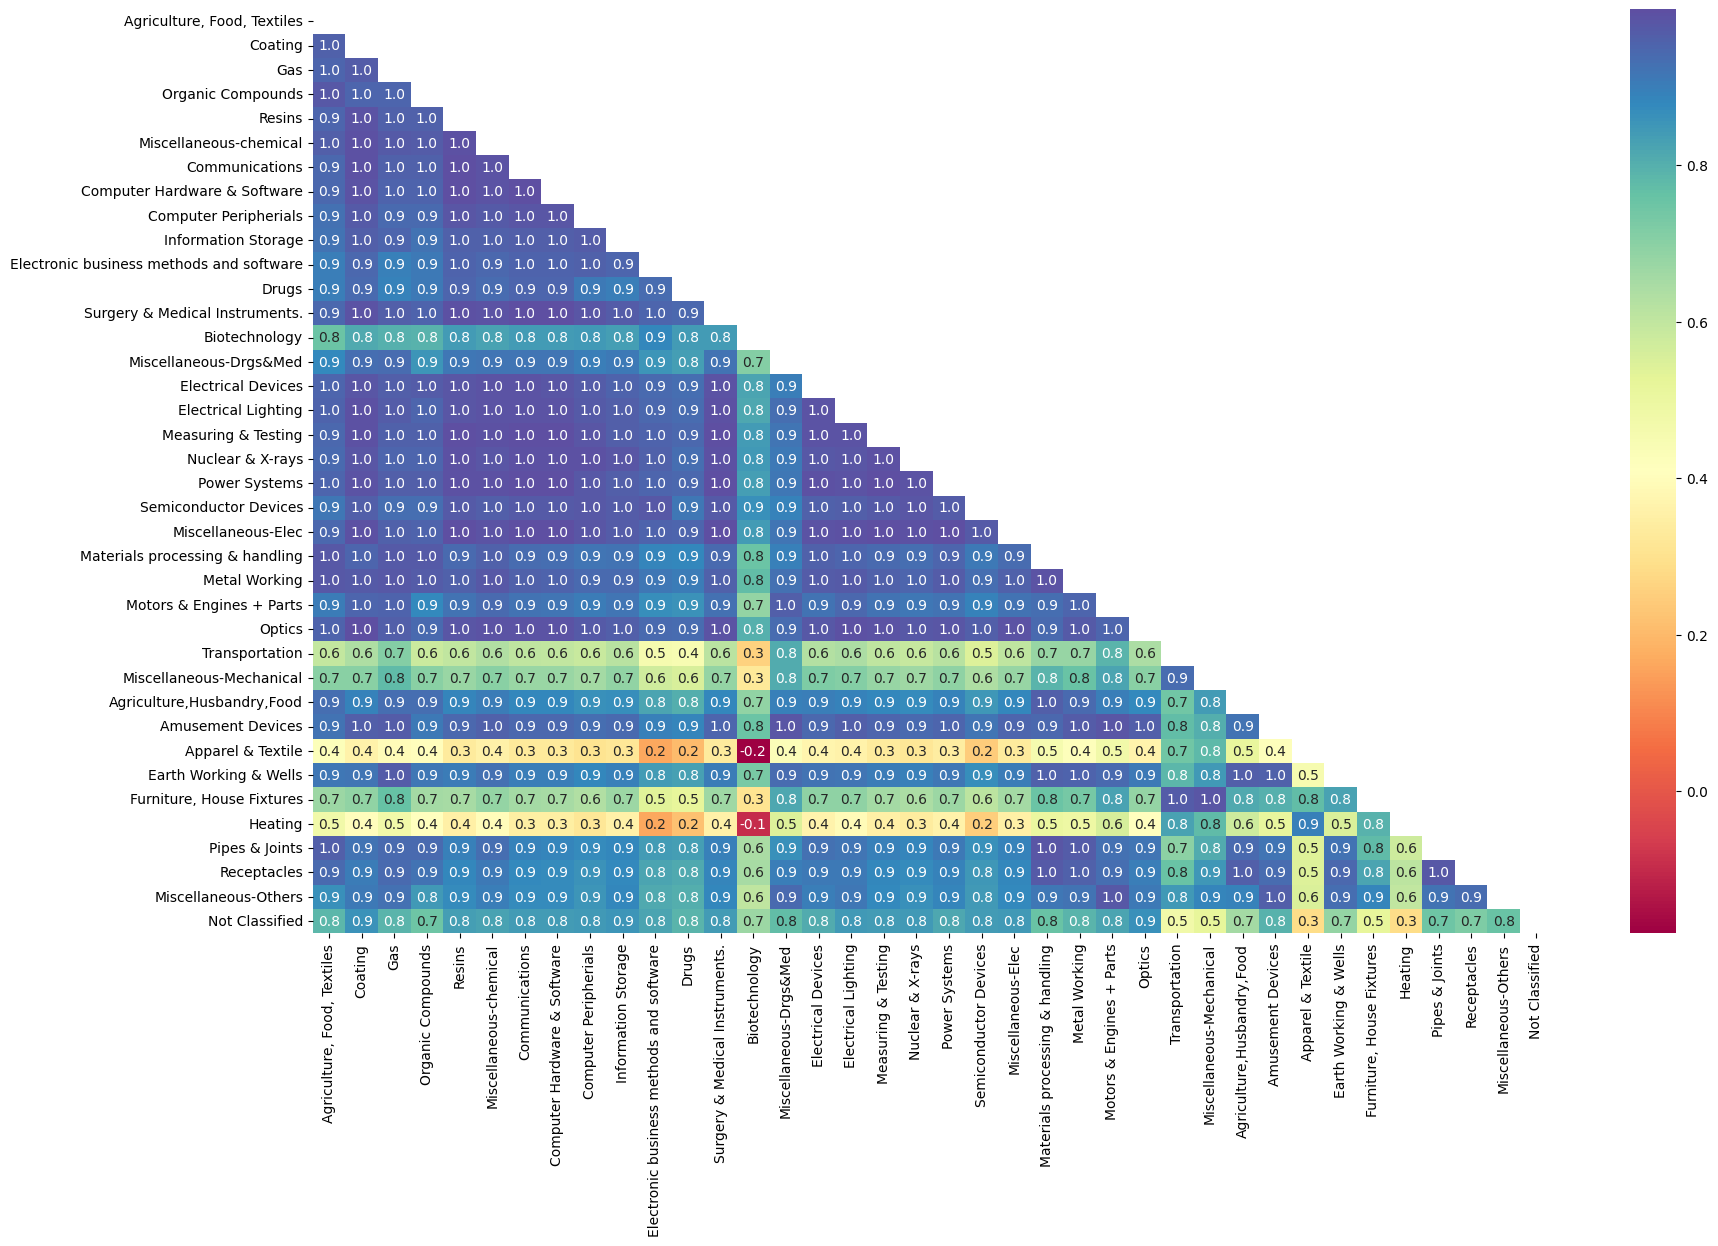

In [12]:
fig, ax = plt.subplots(figsize=(20,12))

subcat = pd.read_csv("../csv/subcategories.csv")
subcategories_name = []

for subcategory in subcat.iloc[:-1,2]:
    subcategories_name.append(subcategory)
sns.heatmap(data=corr_matrix_subcategories_masked,annot=True, ax=ax, fmt="0.1f",cmap="Spectral",xticklabels=subcategories_name, yticklabels=subcategories_name)
plt.show()

***
### Correlation between Categories
##### The correlation matrix for subcategories is an interesting starting point, but a more higher-level (and more immediate to interpret) correlation we can draw is the one between categories in general. 

Let's draw the heatmap, this time relying upon **Plotly Express** rather than Seaborn/Matplotlib. This will make the heatmap interactive for the end-user.

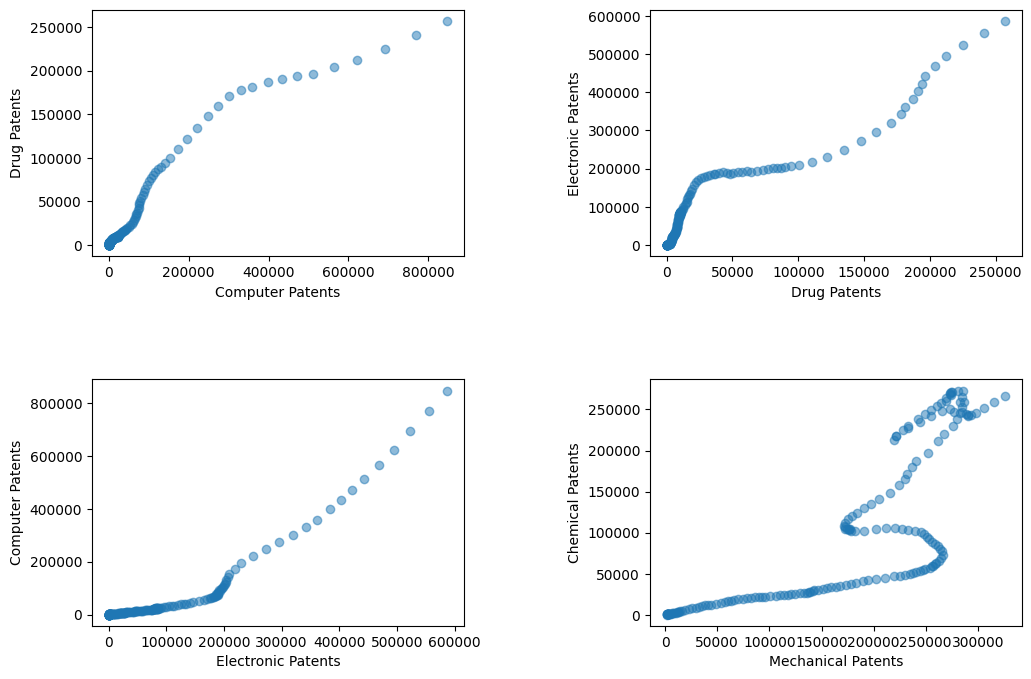

In [14]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

axes[0, 0].scatter(computers, drugs, alpha=0.5)
axes[0, 0].set_xlabel("Computer Patents")
axes[0, 0].set_ylabel("Drug Patents")

axes[0, 1].scatter(drugs, electronic, alpha=0.5)
axes[0, 1].set_xlabel("Drug Patents")
axes[0, 1].set_ylabel("Electronic Patents")

axes[1, 0].scatter(electronic, computers, alpha=0.5)
axes[1, 0].set_xlabel("Electronic Patents")
axes[1, 0].set_ylabel("Computer Patents")

axes[1, 1].scatter(mechanical, chemical, alpha=0.5)
axes[1, 1].set_xlabel("Mechanical Patents")
axes[1, 1].set_ylabel("Chemical Patents")

plt.show()

In [15]:
#Create the correlation matrix to plot in the heatmap
spearman_corr_matrix_categories = nber_categories.corr(method="spearman")
pearson_corr_matrix_categories = nber_categories.corr(method="pearson")


In [16]:
#Plot the heatmap, showing only up to the first 2 decimal digits for the correlation coefficients.
fig = px.imshow(spearman_corr_matrix_categories,text_auto=True, color_continuous_scale='RdBu', labels=dict(color="Correlation Coefficient"))
fig.update_traces(text=np.around(spearman_corr_matrix_categories, decimals=2), texttemplate='%{text:.2f}')

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Corr. Coeff.",
        x=0.8
    ),
    width=700,
    title="Spearman Correlation Matrix for Patents Macro-Categories",
    title_x=0.5,
    title_y=0.95
)

fig2 = px.imshow(pearson_corr_matrix_categories,text_auto=True, color_continuous_scale='RdBu', labels=dict(color="Correlation Coefficient"))
fig2.update_traces(text=np.around(pearson_corr_matrix_categories, decimals=2), texttemplate='%{text:.2f}')
fig2.update_layout(
    coloraxis_colorbar=dict(
        title="Corr. Coeff.",
        x=0.8
    ),
    width=700,
    title="Pearson Correlation Matrix for Patents Macro-Categories",
    title_x=0.5,
    title_y=0.95
)

fig.show(),fig2.show()



(None, None)

Four pairs seem to have a strong positive correlation: Drugs-Computers, Drugs-Electronic, Electronic-Computers, Mechanical-Others. 
###### [Note that *others* is a vast macro-Category including Heating, Pipes, Receptacles, House Fixtures and more. You can see all the sub-categories constituting this macro-Category in the subcategories.csv]

Let's plot 4 different scatterplots to visualize these relationships.

In [17]:
import scipy.stats as stats

# Calculate the Pearson correlation coefficient and p-value
corr, p_value = stats.pearsonr(drugs, computers)
p_value_formatted = "{:.100f}".format(p_value) 

# Output the results
print("Pearson Correlation Coefficient:", corr)
print("P-Value:", p_value_formatted)

# Check the significance 
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient: 0.9589908967345295
P-Value: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011891
The correlation is statistically significant.


In [18]:
import scipy.stats as stats

# Calculate the Pearson correlation coefficient and p-value
corr, p_value = stats.pearsonr(others, computers)
p_value_formatted = "{:.10f}".format(p_value)  

# Output the results
print("Pearson Correlation Coefficient:", corr)
print("P-Value:", p_value_formatted)

# Check the significance 
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient: 0.3403938936580761
P-Value: 0.0000040439
The correlation is statistically significant.


#TODO